In [2]:
%matplotlib inline

import os 
import time
import librosa
import IPython
import librosa.display
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt

from scipy import signal, ndimage

importlib.reload(util)

<module 'pr_util' from '/var/tmp/ff/tcc/code/pr_util.py'>

In [37]:
most3 = util.return_n_most_frequent_species(3, 'song')
alldir = util.return_n_most_frequent_species(100, 'song')
print(len(alldir))
print(alldir)

77
['/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Tangara peruviana/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Amazona Pretrei/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Phylloscartes kronei/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Chlorophanes spiza/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Hemitriccus kaempferi/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Piprites pileata/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Leucopternis polionotus/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Myiobius barbatus/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Streptoprocne biscutata/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Stymphalornis acutirostris/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Cichlocolaptes leucophrus/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Phyllomyias griseocapilla/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_

In [5]:
y, sr = librosa.load(most3[0]+'song/mirlo4.alvaricc.mp3')
#y1, sr1 = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/experimentos_100/Vanellus chilensis/song/Vanellus%20chilensis-2.wav.filtered2.wav')
#y2, sr2 = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/experimentos_100/Trogon surrucura/song/10098-2.wav.filtered1.wav')
#y3, sr3 = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/experimentos_100/Vanellus chilensis/song/10047-1.wav.filtered1.wav')


In [6]:
IPython.display.Audio(data = y, rate = sr)

In [78]:
IPython.display.Audio(data = y2, rate = sr2)

In [79]:
IPython.display.Audio(data = y3, rate = sr2)

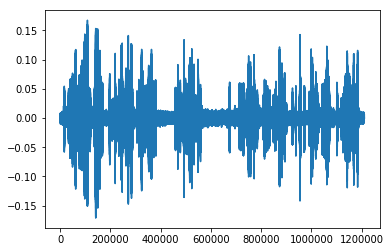

In [7]:
plt.plot(y)

In [32]:
def new_signal_with_energy_threshold(y, size):
    N = len(y)
    energy = y**2
    thres = np.mean(energy)
    new_signal = []
    i = 0
        
    if size > N:
        size = int(N/10)
    
    while i < (N - size):
        if energy[i] > thres:
            new_signal += y[i:i + size].tolist()
            i += size
        else:
            i += 1
    new_signal = np.array(new_signal)
    return new_signal

def new_signal_with_energy_threshold_new(y, size):
    N = len(y)
    energy = y**2
    thres = np.mean(energy)
    new_signal = []
    i = 0
        
    if size > N:
        size = int(N/10)
    
    while i < (N - size):
        print("i: {} j: {} energy: {}".format(i, i+size, energy[i:i+size]))
        if np.mean(energy[i:i+size]) > thres:
            new_signal += y[i:i + size].tolist()
            i += size
        else:
            i += size
    new_signal = np.array(new_signal)
    return new_signal



In [26]:
y_new = new_signal_with_energy_threshold(y, util.time_to_samples(sr=sr, time_sec=0.5))
y_new2 = new_signal_with_energy_threshold_new(y, util.time_to_samples(sr=sr, time_sec=0.5))

#y1_new = new_signal_with_energy_threshold(y1, util.time_to_samples(sr=sr1,time_sec=0.5))
#y2_new = new_signal_with_energy_threshold(y2, util.time_to_samples(sr=sr2,time_sec=0.5))
#y3_new = new_signal_with_energy_threshold(y3, util.time_to_samples(sr=sr3,time_sec=0.5))

i: 0 j: 11025 energy: [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.51853225e-06
   4.11574838e-05   1.15734001e-05]
i: 11025 j: 22050 energy: [  9.66414882e-06   2.39880774e-05   3.21895618e-06 ...,   1.54145774e-09
   2.53275925e-06   4.27971327e-06]
i: 22050 j: 33075 energy: [  4.80337985e-06   1.19260062e-06   6.01741158e-06 ...,   4.15121200e-08
   4.62530552e-05   7.84133226e-05]
i: 33075 j: 44100 energy: [  2.89230485e-07   4.67230802e-06   2.69081211e-05 ...,   4.65116718e-05
   8.21858066e-07   4.25791877e-05]
i: 44100 j: 55125 energy: [  2.56094034e-04   5.18830842e-04   3.77367134e-04 ...,   8.10550700e-05
   2.51108489e-04   6.43782550e-04]
i: 55125 j: 66150 energy: [  2.24920153e-03   3.39215563e-04   1.72684644e-03 ...,   5.12230581e-05
   2.55893974e-05   2.38762050e-06]
i: 66150 j: 77175 energy: [  3.30388889e-06   1.65803566e-08   1.11689371e-06 ...,   4.27375839e-04
   2.72486010e-04   3.62403516e-05]
i: 77175 j: 88200 energy: [  4.98153486e-06   2.2499

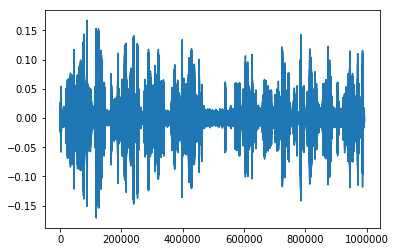

In [27]:
plt.plot(y_new)

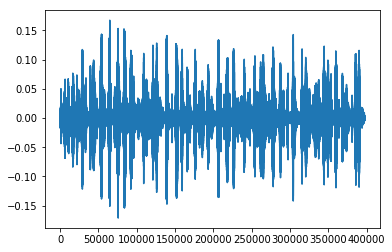

In [28]:
plt.plot(y_new2)

In [30]:
IPython.display.Audio(data = y_new, rate = sr)

In [31]:
IPython.display.Audio(data = y_new2, rate = sr)

In [ ]:
IPython.display.Audio(data = y1_new, rate = sr1)

In [87]:
IPython.display.Audio(data = y2_new, rate = sr2)

In [88]:
IPython.display.Audio(data = y3_new, rate = sr3)